**Домашнее задание к лекции "Визуализация данных"**

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/shusnowman/Netology/bed9e7fef24a08f4d57f0baad51604b79c10e764/SpotifyFeatures.csv')

In [27]:
data.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Пропусков нет, переходим к визуализации 

In [13]:
plt.rcParams['figure.figsize'] = (20,10)

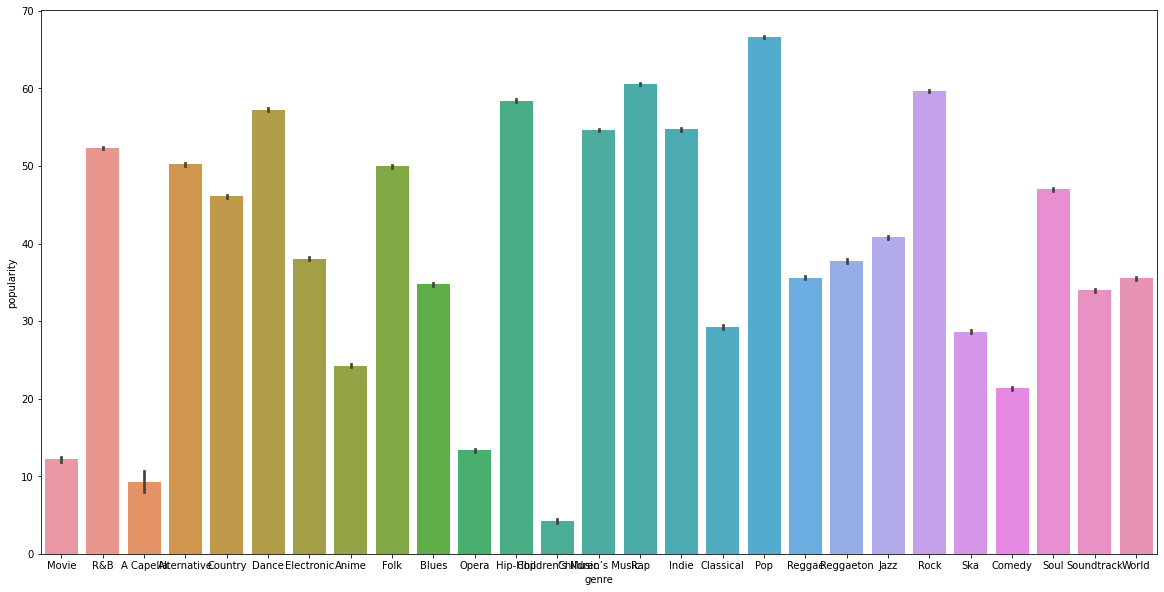

In [12]:
#Bar chart: Popularity by Genre
sns.barplot(x='genre', y='popularity', data=data)
plt.show()

Самым популярным жанром является Pop, также рядом hip-hop, dance и rock. Из этого можно построить гипотезу, что ползователи предпочитают энергичную музыку. Это можно проверить (а заодно посмотреть корреляции)

<Axes: >

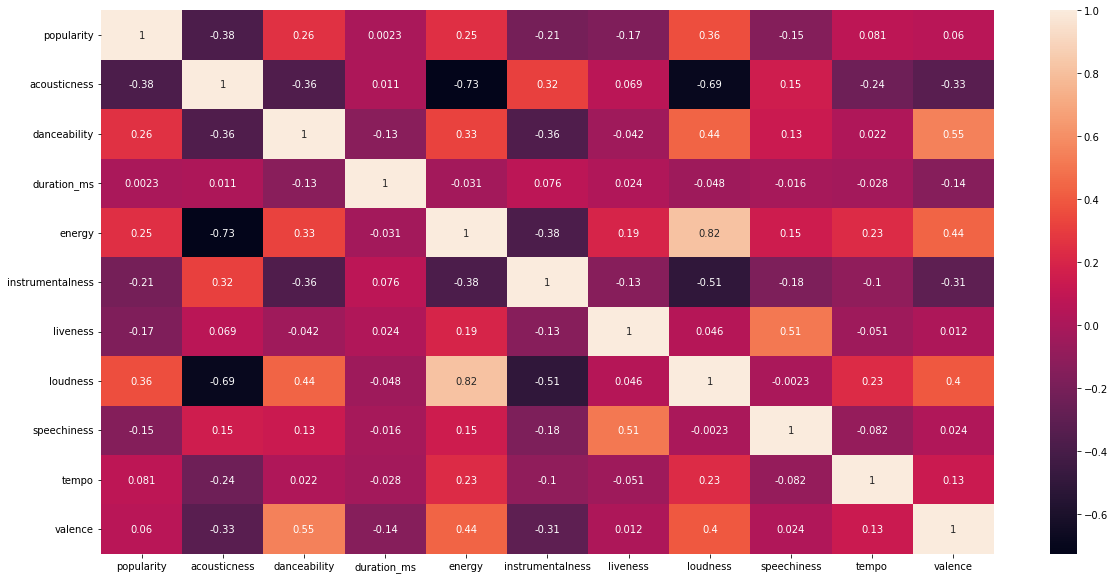

In [14]:
#correlation matrix
sns.heatmap(data.corr(), annot=True)

Теория провалилась (корреляция всего 0,25), зато мы уналим о сильной связи между danceability и valence (0,55)

Pie chart: Key distribution

<Axes: title={'center': 'Popularity by Key'}, ylabel='key'>

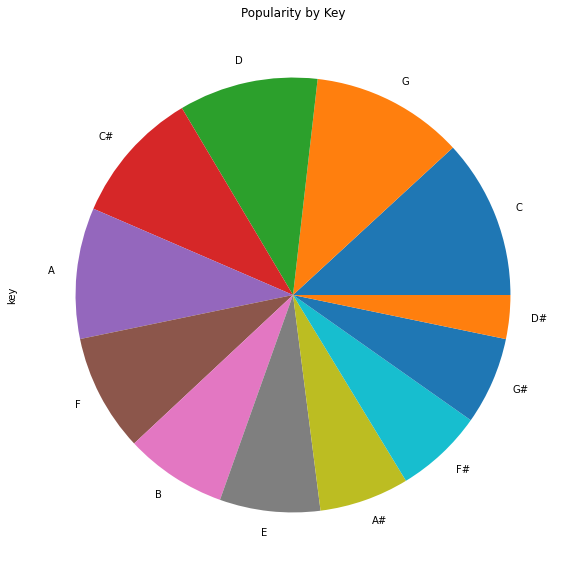

In [19]:
pie_data = data['key'].value_counts()
pie_data.plot(kind='pie', title='Popularity by Key')

Диаграммы типа **pie**  в лекции не рекомендовали использовать, но как не визуализировать типы тональностей. Как обычно лидируют моль, до, ре, ля. Так что использование диезных тональностей может добавить оригинальности звучания!

<ipython-input-25-74477076588e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['popularity'], fit=norm)  #fit a normal distribution to the data


<Axes: xlabel='popularity', ylabel='Density'>

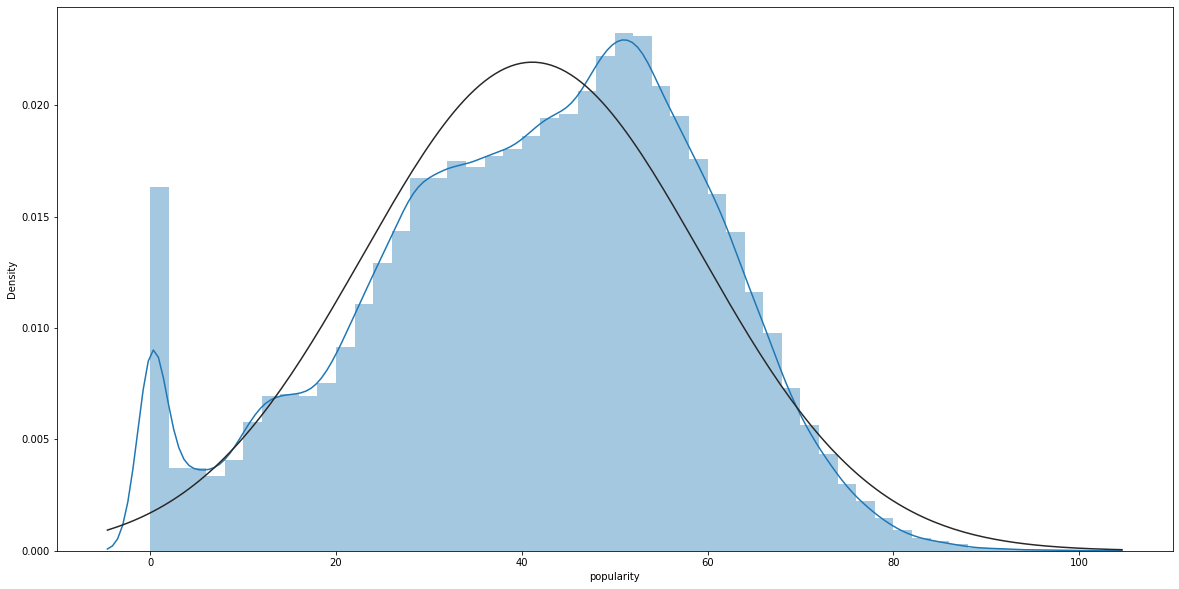

In [25]:
from scipy.stats import norm
sns.distplot(data['popularity'], fit=norm)  #fit a normal distribution to the data

Данные по популярности практически соответствуют нормальному распределению, но есть выборосы около 0, они могут влиять на результаты исследований. Датасет надо чистить